# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

In [2]:
ID = 199444169
sectors = np.array([16])

period = 1.2168991874
tdepth = 0.0364251015**2

lc = pd.read_csv("TOI_1410_16.csv", header=None)
contrastcurve_file = "Palomar_5m_K.csv"

band = 'K'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

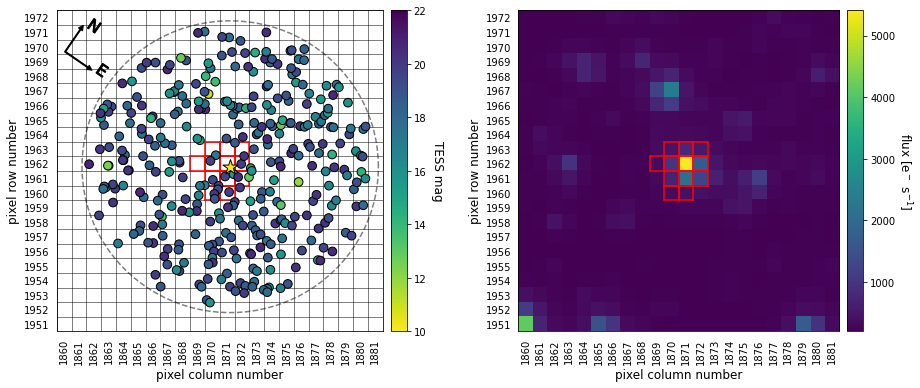

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,199444169,10.1917,9.251,8.705,8.577,334.883243,42.560269,0.71,0.778749,4507.0,13.716600,0.000,0.000
1,199444165,15.3000,14.551,14.308,14.387,334.887151,42.558562,1.09,1.205230,5960.0,0.512090,12.050,120.676
2,2005852885,19.4955,NaN,NaN,NaN,334.884017,42.555893,NaN,NaN,5512.0,0.037210,15.889,172.578
3,2005852884,19.8389,NaN,NaN,NaN,334.887293,42.563666,NaN,NaN,4525.0,0.574008,16.274,41.296
4,2005852863,20.4712,NaN,NaN,NaN,334.889991,42.558634,NaN,NaN,NaN,NaN,18.838,108.209
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2005852995,18.2300,NaN,NaN,NaN,334.879532,42.615970,NaN,NaN,4489.0,0.847013,200.764,357.193
332,2005852804,20.2032,NaN,NaN,NaN,334.809112,42.548847,NaN,NaN,NaN,-2.558470,200.841,258.211
333,2005852694,20.7719,NaN,NaN,NaN,334.819923,42.529362,NaN,NaN,NaN,NaN,201.456,236.496
334,2005853012,20.4944,NaN,NaN,NaN,334.857503,42.612972,NaN,NaN,NaN,NaN,201.622,340.231


In [4]:
ap = np.array([[1870, 1960], [1871, 1960], [1870, 1961], [1871, 1961],
               [1872, 1961], [1869, 1962], [1870, 1962], [1871, 1962],
               [1872, 1962], [1870, 1963], [1871, 1963], [1872, 1963]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [5]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,199444169,10.1917,9.251,8.705,8.577,334.883243,42.560269,0.71,0.778749,4507.0,13.716600,0.000,0.000,9.399969e-01,0.001411
1,199444165,15.3000,14.551,14.308,14.387,334.887151,42.558562,1.09,1.205230,5960.0,0.512090,12.050,120.676,7.815171e-03,0.169771
2,2005852885,19.4955,NaN,NaN,NaN,334.884017,42.555893,NaN,NaN,5512.0,0.037210,15.889,172.578,1.751754e-04,0.000000
3,2005852884,19.8389,NaN,NaN,NaN,334.887293,42.563666,NaN,NaN,4525.0,0.574008,16.274,41.296,1.036963e-04,0.000000
4,2005852863,20.4712,NaN,NaN,NaN,334.889991,42.558634,NaN,NaN,NaN,NaN,18.838,108.209,5.735130e-05,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2005852995,18.2300,NaN,NaN,NaN,334.879532,42.615970,NaN,NaN,4489.0,0.847013,200.764,357.193,3.098292e-27,0.000000
332,2005852804,20.2032,NaN,NaN,NaN,334.809112,42.548847,NaN,NaN,NaN,-2.558470,200.841,258.211,1.559397e-24,0.000000
333,2005852694,20.7719,NaN,NaN,NaN,334.819923,42.529362,NaN,NaN,NaN,NaN,201.456,236.496,1.494428e-24,0.000000
334,2005853012,20.4944,NaN,NaN,NaN,334.857503,42.612972,NaN,NaN,NaN,NaN,201.622,340.231,4.166064e-29,0.000000


# Ploting CC File

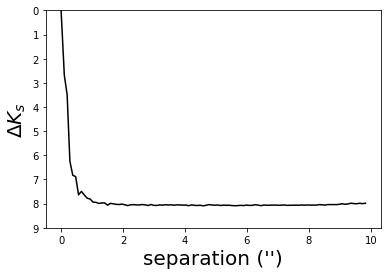

In [6]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

In [7]:
%%time
# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

#lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

target.calc_probs(time = lc.time.value, 
                  flux_0 = lc.flux.value, 
                  flux_err_0 = np.mean(lc.flux_err.value), 
                  P_orb = P_orb,
                  contrast_curve_file = contrastcurve_file,
                  filt = band,
                  exptime = 0.0013888888888889)

Calculating TP scenario probabilitiey for 199444169.
Calculating EB and EBx2P scenario probabilities for 199444169.
Calculating PTP scenario probability for 199444169.
Calculating PEB and PEBx2P scenario probabilities for 199444169.
Calculating STP scenario probability for 199444169.
Calculating SEB and SEBx2P scenario probabilities for 199444169.
Calculating DTP scenario probability for 199444169.
Calculating DEB and DEBx2P scenario probabilities for 199444169.
Calculating BTP scenario probability for 199444169.
Calculating BEB and BEBx2P scenario probabilities for 199444169.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 199444165.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 199444170.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 199444181.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 199444172.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 199444178.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 1

In [8]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  6.493524782380522e-05
NFPP =  5.952475155507606e-06


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,199444169,TP,0.710000,0.778749,1.216899,85.176197,0.492726,0.472250,324.929510,3.081004,0.000000,0.000000,7.112983e-01
1,199444169,EB,0.710000,0.778749,1.216899,71.987430,1.816888,0.181466,41.284989,0.000000,0.637400,0.658037,1.987289e-71
2,199444169,EBx2P,0.710000,0.778749,2.433798,82.465102,1.361971,0.316074,188.735163,0.000000,0.708234,0.739388,2.709095e-16
3,199444169,PTP,0.710000,0.778749,1.216899,89.278055,0.051275,0.453354,9.237072,3.134415,0.000000,0.000000,1.845740e-02
4,199444169,PEB,0.710000,0.778749,1.216899,80.405071,1.040890,0.148000,221.961121,0.000000,0.104731,0.126697,2.062253e-54
5,199444169,PEBx2P,0.710000,0.778749,2.433798,83.717271,0.791402,0.566603,177.234049,0.000000,0.691671,0.721829,7.615746e-10
6,199444169,STP,0.661881,0.687715,1.216899,88.617320,0.109464,0.381773,22.261446,4.312786,0.000000,0.000000,5.697501e-05
7,199444169,SEB,0.194533,0.225003,1.216899,86.963262,0.507109,0.695622,205.381963,0.000000,0.033109,0.100000,1.559351e-09
8,199444169,SEBx2P,0.200936,0.230853,2.433798,87.264739,1.095839,0.467165,201.700985,0.000000,0.198953,0.229046,2.817129e-09
9,199444169,DTP,0.710000,0.778749,1.216899,86.439836,0.372437,0.498574,321.324357,3.084180,0.000000,0.000000,2.701794e-01


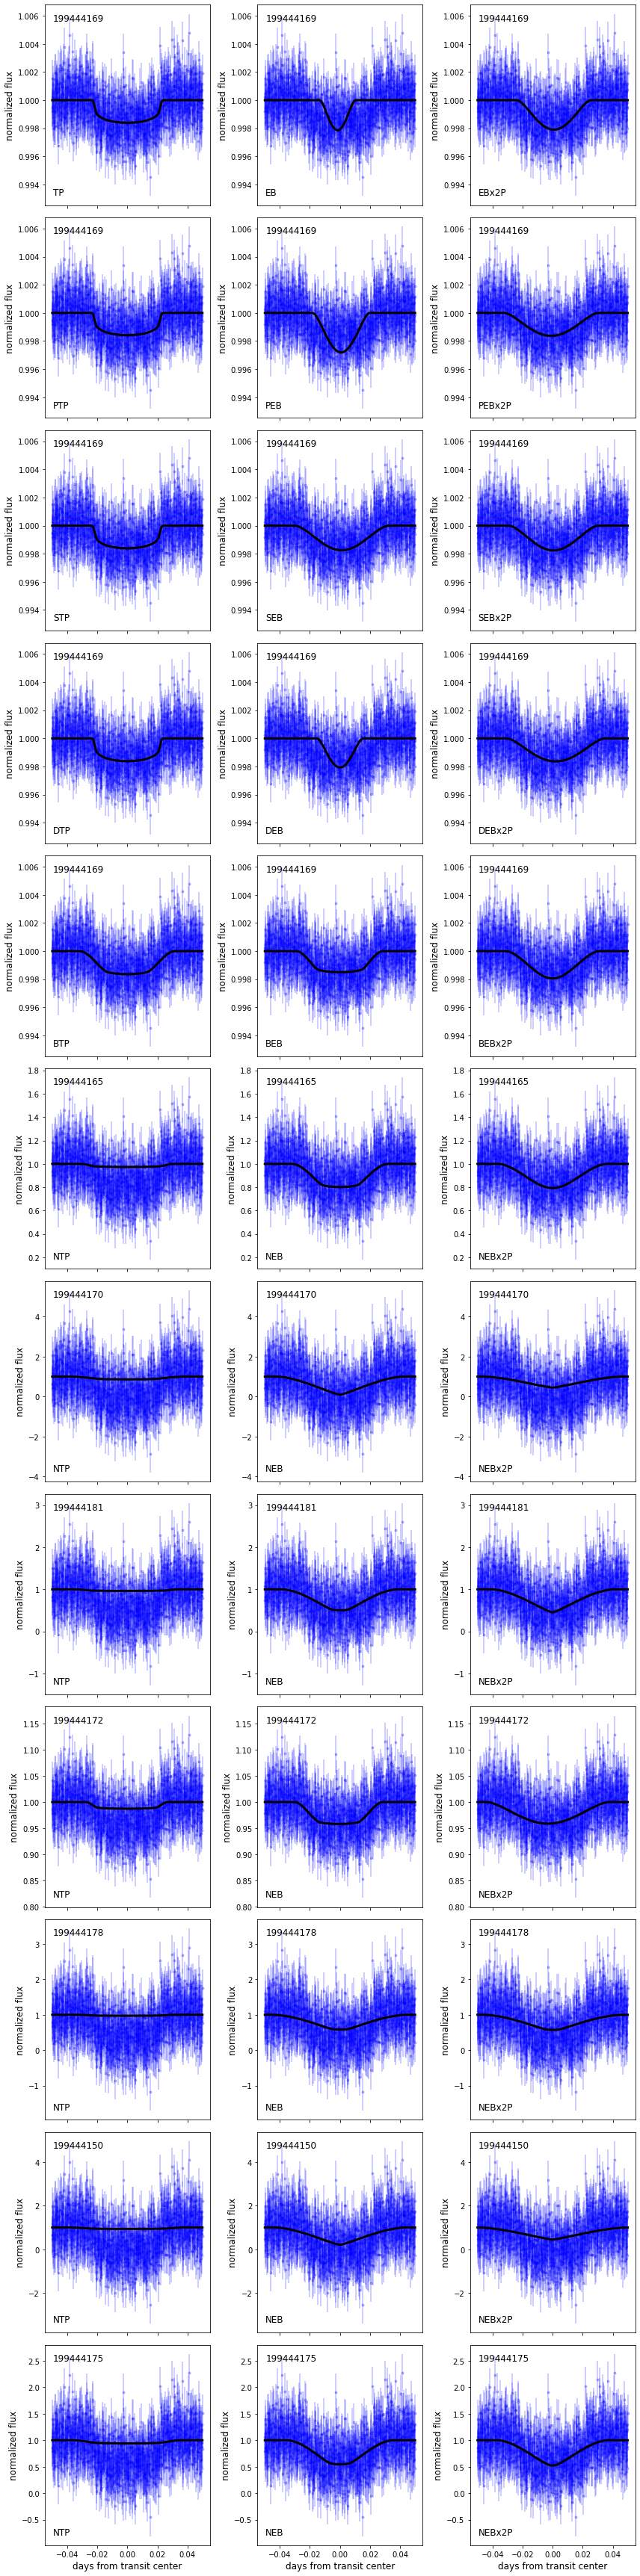

In [9]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))

# Output

In [ ]:
# Filter: (G) 562 nm

FPP_G = []
NFPP_G = []

print("   FPP  = ",np.mean(FPP_G),"+/-",np.std(FPP_G))
print("   NFPP = ",np.mean(NFPP_G),"+/-",np.std(NFPP_G))

In [ ]:
# Filter: (I) 832 nm

FPP_I = []
NFPP_I = []

print("   FPP  = ",np.mean(FPP_I),"+/-",np.std(FPP_I))
print("   NFPP = ",np.mean(NFPP_I),"+/-",np.std(NFPP_I))

In [ ]:
# Filter: (K) BrGamma

FPP_K = []
NFPP_K = []

print("   FPP  = ",np.mean(FPP_K),"+/-",np.std(FPP_K))
print("   NFPP = ",np.mean(NFPP_K),"+/-",np.std(NFPP_K))

In [ ]:
# Filter: (I) NIRI

FPP_I = []
NFPP_I = []

print("   FPP  = ",np.mean(FPP_I),"+/-",np.std(FPP_I))
print("   NFPP = ",np.mean(NFPP_I),"+/-",np.std(NFPP_I))